In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Read The Dataset

In [2]:
# Read the data
data_path = 'CC_GENERAL.csv'
raw_df = pd.read_csv(data_path)
print('The shape of the dataset is:', raw_df.shape)

The shape of the dataset is: (8950, 18)


# Data Investigation

In [3]:
# Let's see the data types and non-null values for each column
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [15]:
# Count number of null values
raw_df.isnull().sum(axis=0).sort_values(ascending=False).head()

MINIMUM_PAYMENTS          313
CREDIT_LIMIT                1
BALANCE                     0
CASH_ADVANCE_FREQUENCY      0
PRC_FULL_PAYMENT            0
dtype: int64

In [5]:
# Basic statistics for numerical columns
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [3]:
raw_df.drop(columns='CUST_ID', inplace=True)

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

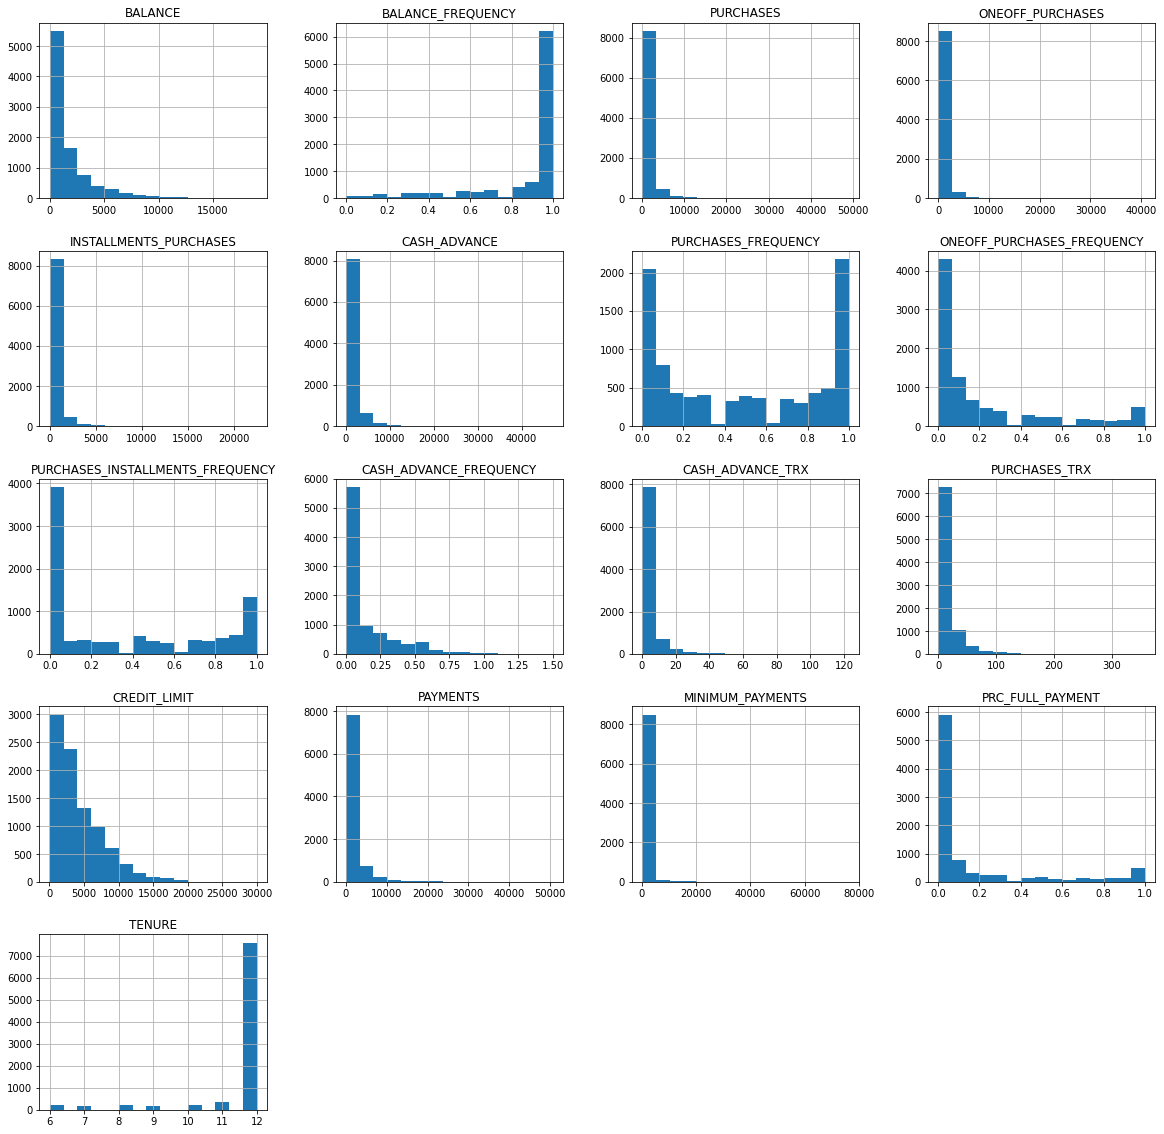

In [7]:
raw_df.hist(figsize=(20, 20), grid=True, bins=15)

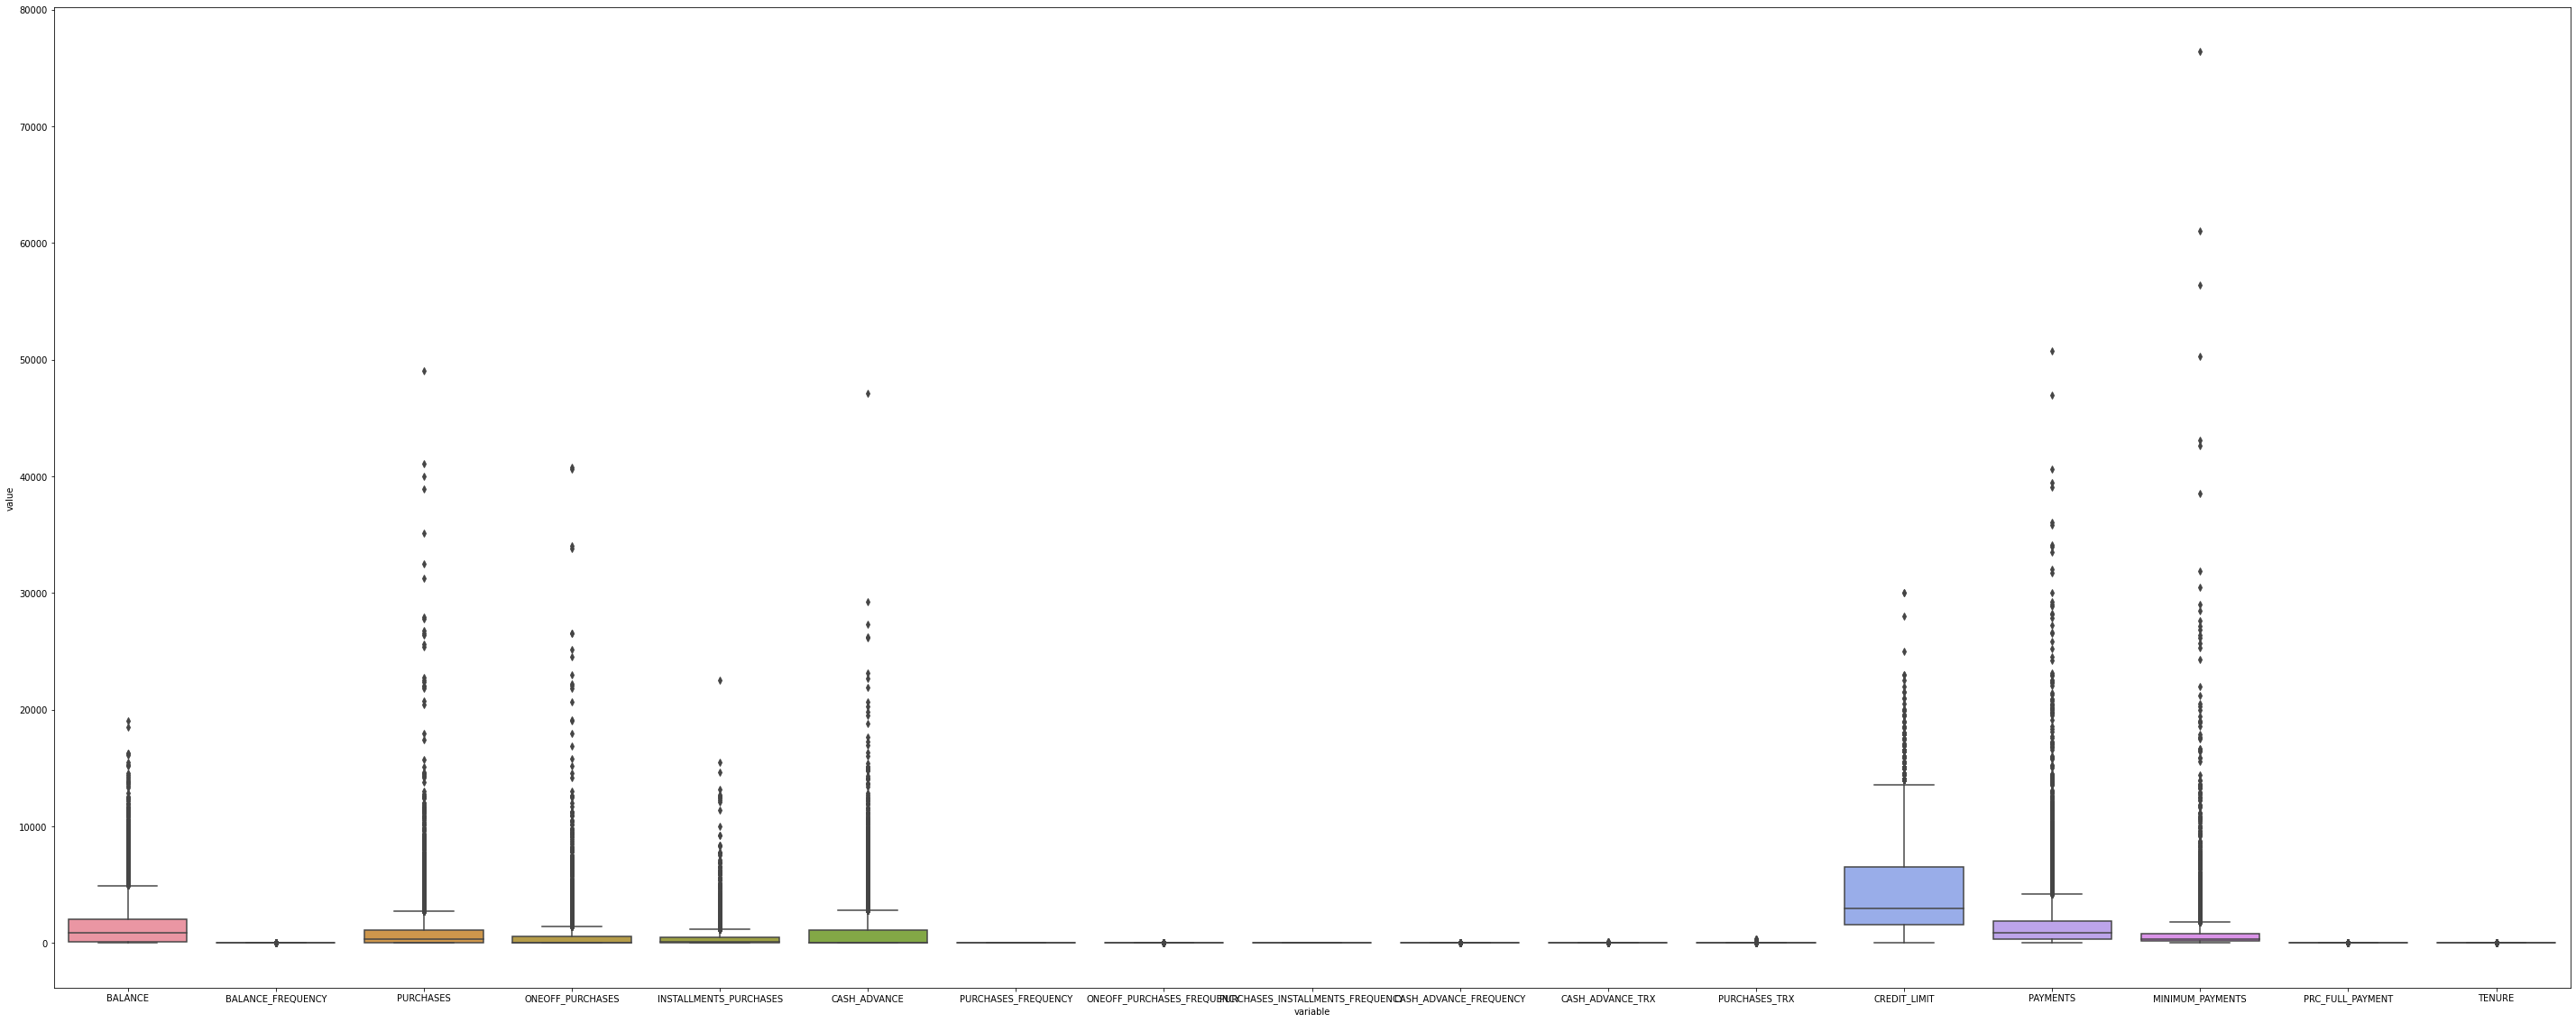

In [8]:
plt.figure(figsize=(50,20))
sns.boxplot(x="variable", y="value", data=pd.melt(raw_df))
plt.show()

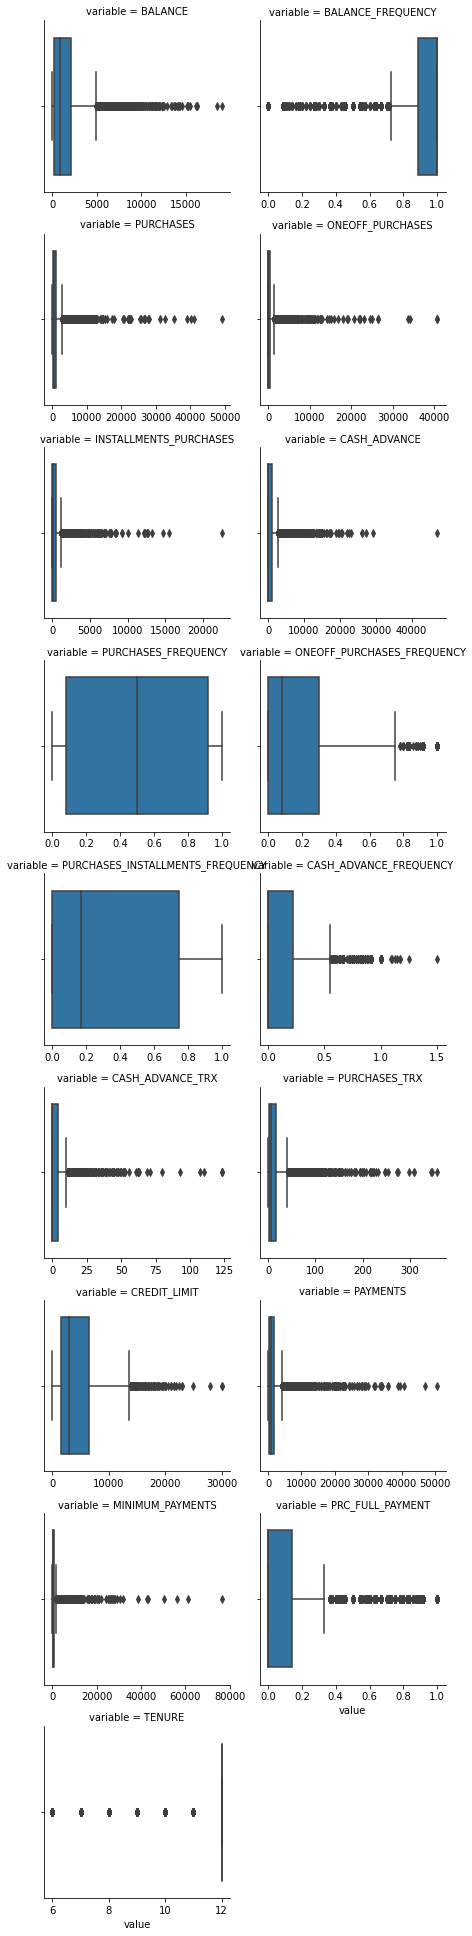

In [9]:
f = pd.melt(raw_df, value_vars=raw_df.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.boxplot, "value")

<AxesSubplot:>

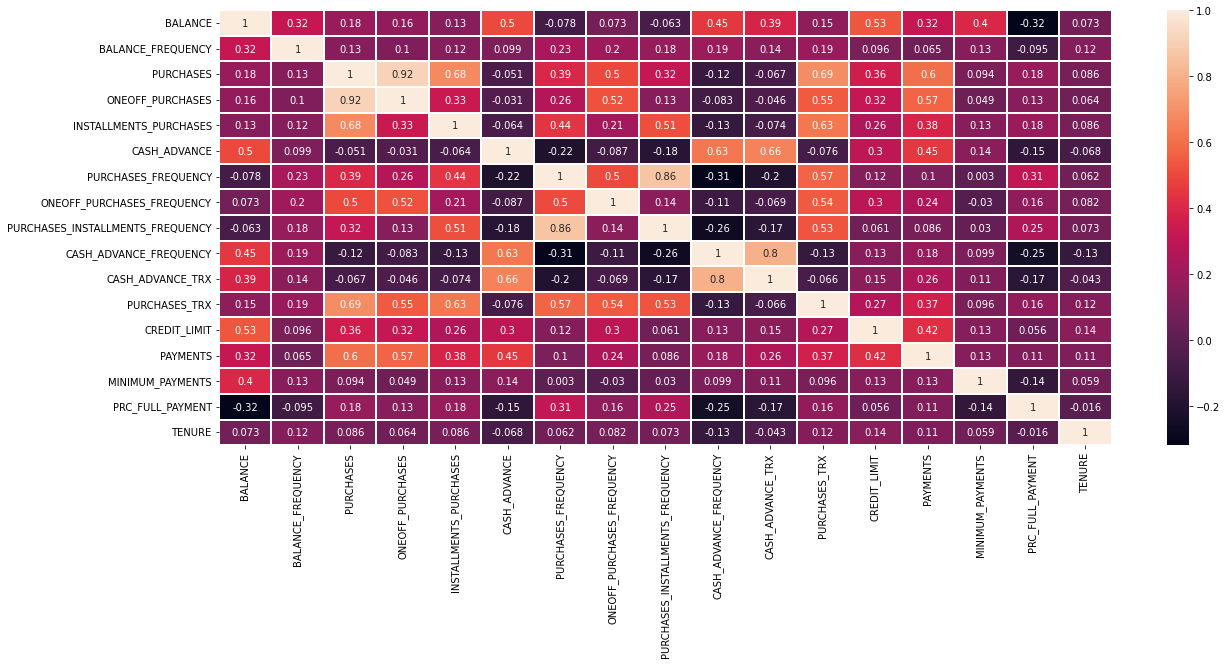

In [10]:
plt.figure(figsize = (20, 8))
sns.heatmap(raw_df.corr(), annot=True, linewidths=0.1)

In [4]:
df_copy = raw_df.copy()

**Drop Null Values**

In [135]:
df_copy.dropna(inplace=True)
df_copy.isnull().sum(axis=0).head()
df_copy.reset_index(inplace=True)

**Evaluate the difference between data transformation techniques**

In [136]:
df_logged = np.log1p(df_copy)

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>],
       [<AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>],
       [<AxesSubplot:title={'center':'PURCHASES_TRX'}>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>],
       [<AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}

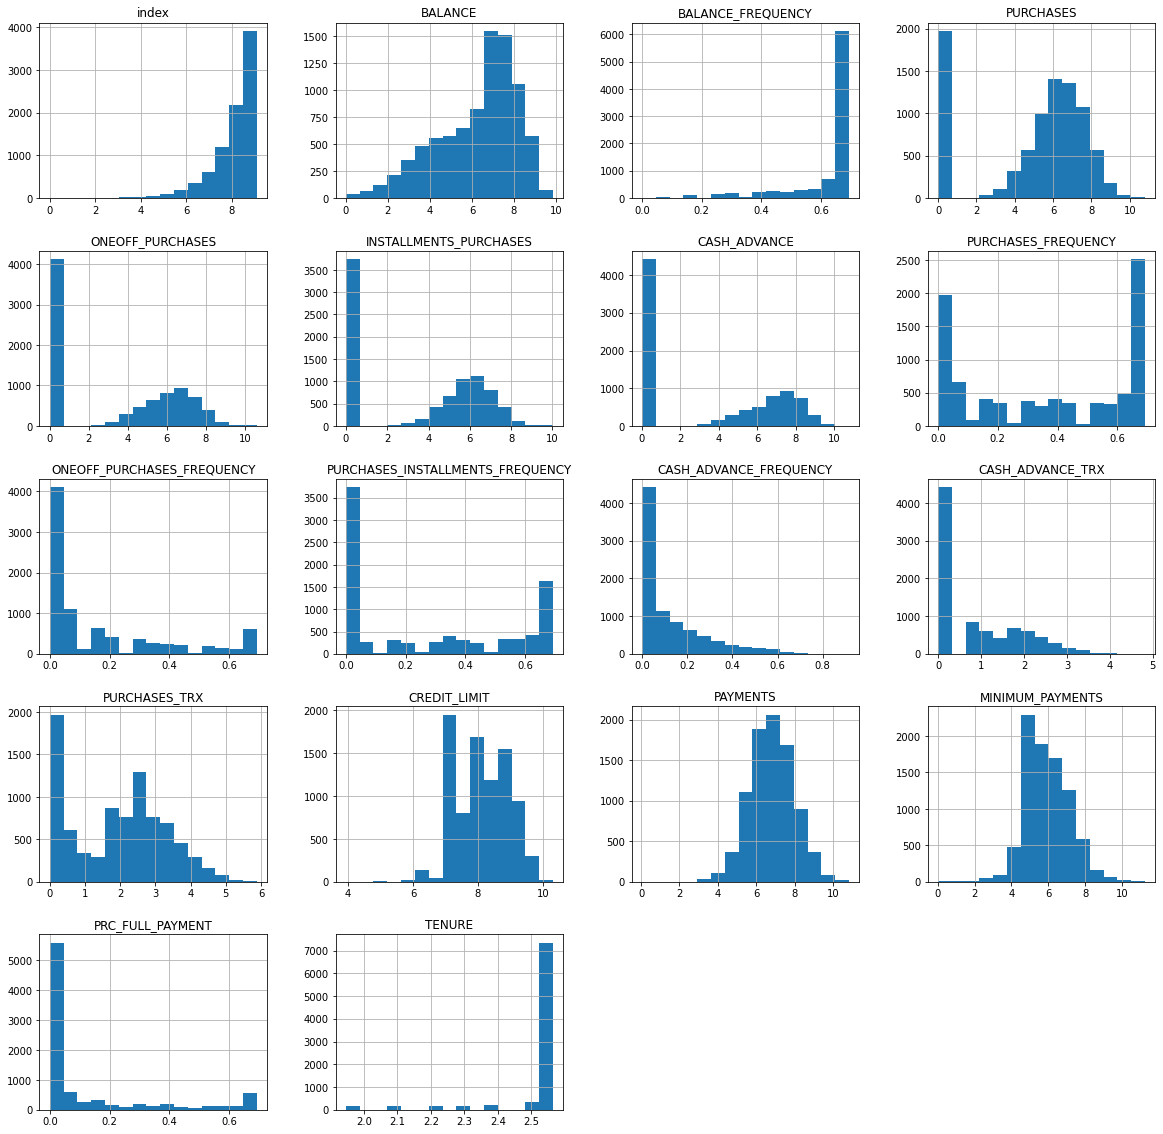

In [137]:
df_logged.hist(figsize=(20, 20), grid=True, bins=15)

In [138]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            perplexity=30, 
            learning_rate=10, 
            init='pca', 
            method='barnes_hut', 
            n_jobs=-1, 
            n_iter=10**3, 
            random_state=42).fit_transform(df_logged)
                       

In [139]:
from sklearn.decomposition import PCA

In [140]:
pca = PCA()
pca_logged = pca.fit_transform(df_logged)

In [141]:
pca.explained_variance_ratio_

array([4.94042062e-01, 2.35566115e-01, 1.42675965e-01, 5.05504759e-02,
       2.06900738e-02, 1.70998788e-02, 1.52574295e-02, 8.10781558e-03,
       6.18532574e-03, 4.78893863e-03, 3.49620528e-03, 5.44685684e-04,
       2.95518204e-04, 2.66801128e-04, 2.17174217e-04, 1.19064995e-04,
       5.06909969e-05, 4.57795989e-05])

**Choose number of components for PCA**

In [142]:
px.line(x=np.arange(1, len(df_copy.columns)+1), y=np.cumsum(pca.explained_variance_ratio_), markers='o')

In [143]:
pca = PCA(n_components=9)
df_logged_pca = pca.fit_transform(df_logged)

In [144]:
from sklearn.neighbors import NearestNeighbors

In [150]:
knn = NearestNeighbors()

knn.fit(df_logged_pca)

distances, neighbors = knn.kneighbors(df_logged_pca)
distances = np.sort(distances[:, -1], axis = 0)

**Choose The Epsilon(eps) parameter**

In [151]:
px.line(x=np.arange(len(distances)), y=distances)

In [147]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [189]:
db1 = DBSCAN(eps=2.2, min_samples=5, metric='euclidean').fit(df_logged_pca)
labels = db1.labels_
silhouette_score(df_logged_pca, labels)

0.40835838520934187

In [190]:
tsne_projection = pd.DataFrame(tsne, columns=['feature1', 'feature2'], index=df_copy.index.tolist())
tsne_projection['cluster'] = db1.labels_
print(tsne_projection['cluster'].value_counts())
tsne_projection['cluster'].replace(-1, "anomaly", inplace=True)
px.scatter(tsne_projection, x='feature1', y='feature2', color="cluster")

 2    2687
 0    1955
 1    1666
 4     970
 3     745
 5     432
-1     181
Name: cluster, dtype: int64


In [163]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=9, kernel='rbf', gamma=0.02)
df_logged_kpca = kpca.fit_transform(df_logged)

In [164]:
knn = NearestNeighbors()
knn.fit(df_logged_kpca)

distances, neighbors = knn.kneighbors(df_logged_kpca)

distances = np.sort(distances[:, -1], axis=0)

In [165]:
px.line(x=np.arange(len(distances)), y=distances)

In [194]:
db2 = DBSCAN(eps=0.16, min_samples=5, metric='euclidean').fit(df_logged_kpca)
labels = db2.labels_
silhouette_score(df_logged_kpca, labels)

0.5228414749186049

In [195]:
tsne_projection = pd.DataFrame(tsne, columns=['feature1', 'feature2'], index=df_copy.index.tolist())
tsne_projection['cluster'] = db2.labels_
print(tsne_projection['cluster'].value_counts())
tsne_projection['cluster'].replace(-1, "anomaly", inplace=True)
px.scatter(tsne_projection, x='feature1', y='feature2', color="cluster")

 1    1968
 5    1700
 0    1694
 4    1000
 2     952
 3     749
 6     436
-1     137
Name: cluster, dtype: int64
